## Clasificación de tipos de ropa

Completa el notebook y logra un error de validación ≤ 𝟎. 𝟑 (alrededor del 89% de exactitud)

### Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

### Descargar el conjunto de datos

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Exploración de los datos


In [4]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [6]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [7]:
# Reescalar las imágenes. Deben estar en un rango de [0-1]
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [9]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

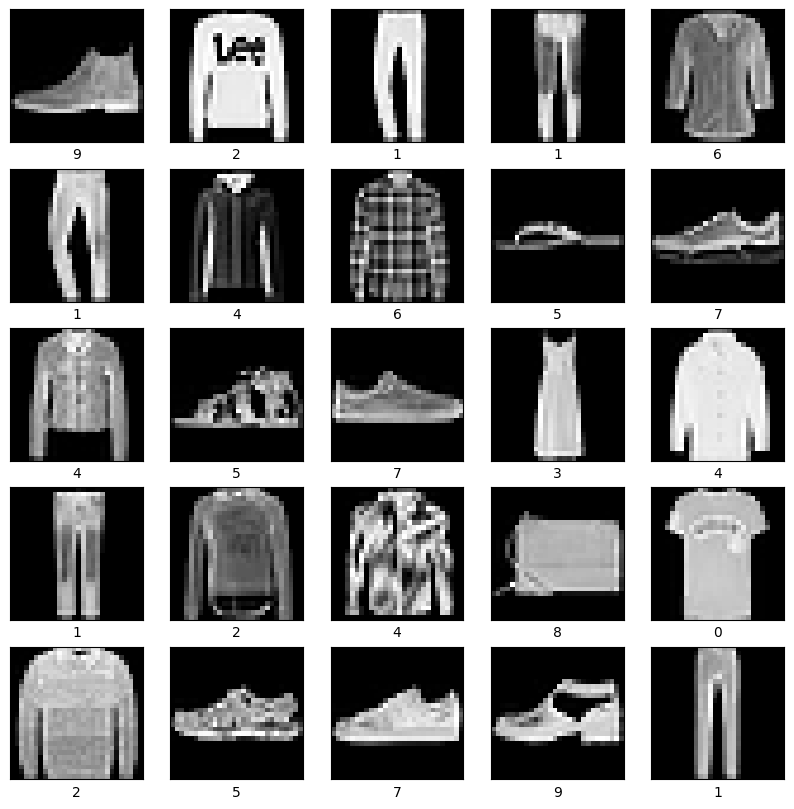

In [10]:
visualize_dataset(5,x_test,y_test)

In [11]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()

Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


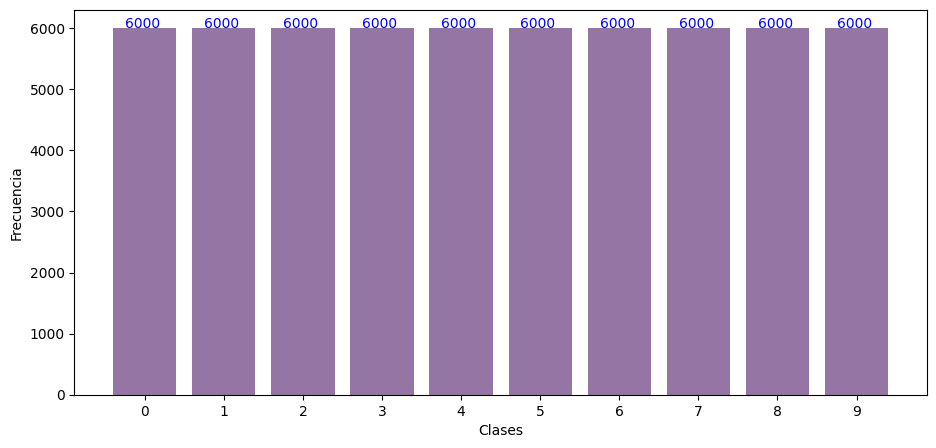

In [12]:
visualize_labels(y_train, True)

### Definición del modelo

In [13]:
# Define tu modelo
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\santi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.



### Entrenamiento del modelo


In [21]:
es = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_FashionMnist.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [22]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[checkpoint,es] , batch_size=128,epochs=100,verbose=1)

Epoch 1/100
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7055 - loss: 0.8753
Epoch 1: val_loss improved from inf to 0.45996, saving model to best_model_FashionMnist.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7068 - loss: 0.8712 - val_accuracy: 0.8376 - val_loss: 0.4600
Epoch 2/100
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8526 - loss: 0.4148
Epoch 2: val_loss improved from 0.45996 to 0.43301, saving model to best_model_FashionMnist.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - loss: 0.4147 - val_accuracy: 0.8425 - val_loss: 0.4330
Epoch 3/100
423/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3788
Epoch 3: val_loss improved from 0.43301 to 0.40176, saving model to best_model_FashionMnist.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8636 - loss: 0.3782 - val_accuracy: 0.8564 - val_loss: 0.4018
Epoch 4/100
427/469 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8724 - loss: 0.3533
Epoch

### Evaluación del modelo

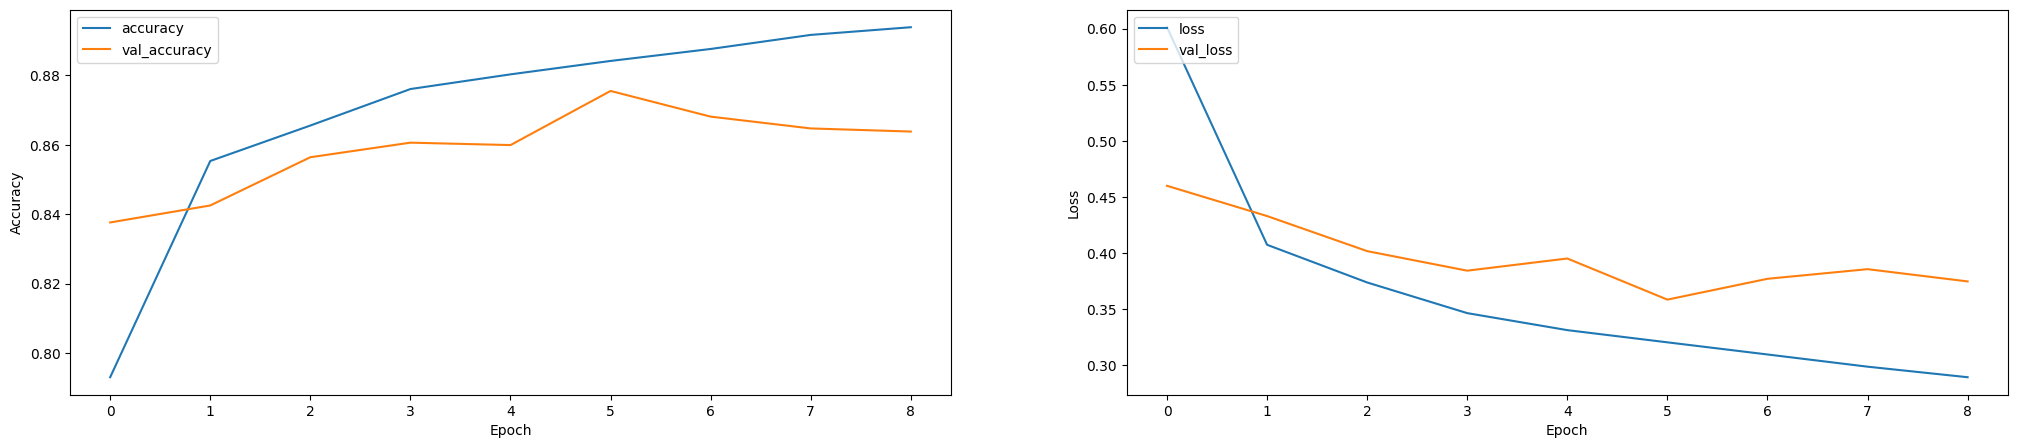

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'train accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8640 - loss: 0.3695
train accuracy: 0.864
Test loss: 0.375


Evaluación del mejor modelo

In [25]:
from tensorflow.keras.models import load_model

In [30]:
nn = load_model('C:/Users/santi/OneDrive/Documents/Programacion/Proyectos/Notebooks-Module1/Part2/best_model_FashionMnist.keras')

In [31]:
test_loss, test_acc = nn.evaluate(x_test, y_test)
print(f'train accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8780 - loss: 0.3575
train accuracy: 0.876
Test loss: 0.359


In [32]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


Matriz de confusión

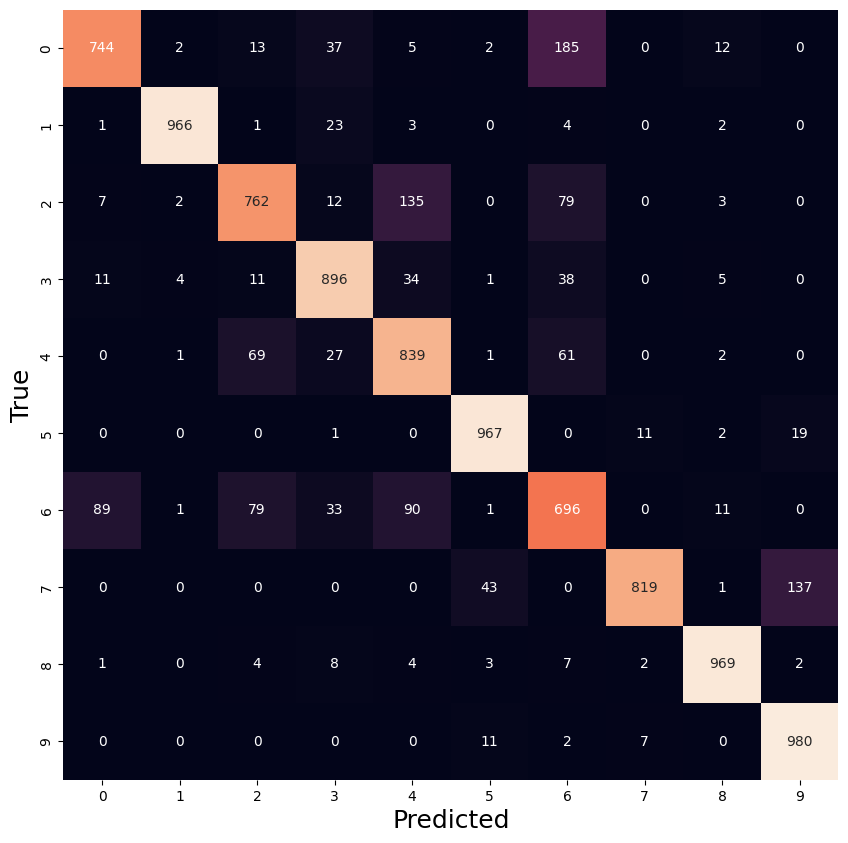

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.76      0.79      1000
           3       0.86      0.90      0.88      1000
           4       0.76      0.84      0.80      1000
           5       0.94      0.97      0.95      1000
           6       0.65      0.70      0.67      1000
           7       0.98      0.82      0.89      1000
           8       0.96      0.97      0.97      1000
           9       0.86      0.98      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [35]:
def plot_prediction(index):
    print('Valor real: ',y_test[index] )
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  6
Predicción:  6


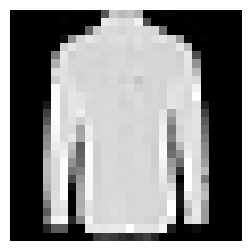

In [36]:
i = 92
plot_prediction(i)